<a href="https://colab.research.google.com/github/sreenithya-reddy/UberRequestDataAnalysis/blob/main/Uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Type - EDA**

**Contribuation** - Individual

**Project Summmary** -
In order to identify trends in demand, trip completion, cancellations, and operational inefficiencies, this project focusses on doing exploratory data analysis (EDA) on Uber ride request data.  Driver IDs, trip status, pickup locations, and request/drop timestamps are all included in the dataset's comprehensive ride request records.  The objective is to assist Uber in optimising driver allocation and service availability by gaining valuable information regarding ride request behaviour.

 Excel was used to start our study, with an initial emphasis on data processing and cleansing.  We translated timestamps into uniform forms, checked that all necessary columns were present, and confirmed the dataset's structure.  Only minor changes, such addressing 'NA' values in the drop date for incomplete trips, were required because the data was comparatively clean.

 We then extracted important insights from the dataset using SQL in DB Browser.  To make time-based analysis easier, we changed the uploaded table to uber_data and included a cleaned datetime field.  Specific business concerns were addressed using SQL queries:

** Peak Demand Hours:** To determine when the majority of requests happen, we categorised request timestamps by hour.  This helped with staffing selections by revealing the busiest times.

 **Most Popular Pickup sites:** We identified the busiest pickup sites by tallying enquiries by location (airport vs. city).

**Average Trip Duration:** This measure, which provides information on trip efficiency, is computed by deducting request time from drop time for completed trips.

After the SQL phase, we created a simple, contemporary Excel dashboard to show our results.  The dashboard has the following:

Request distribution by status (Completed, Cancelled, No Cars) is displayed in

 1) a pie chart.

2) A bar graph illustrating the frequency of pickups

3) A line graph that displays the hourly total demand

4) A combination chart that displays the percentage of "No Cars Available" by hour.

5) A bar graph that shows the number of travel cancellations by hour

6) An overview of the typical journey time

 We made sure the dashboard's design was tidy, expert, and educational.  To keep the design simple, the raw data tables that drove the graphics were relocated to a hidden sheet.

 Lastly, for more in-depth EDA, we switched to Google Colab (Python).  We will repeat and build upon the SQL findings, investigate other correlations (such as status vs time of day), and more dynamically visualise patterns using pandas and matplotlib/seaborn.

**GitHub Link -**

**Problem Statement - **

Customer complaints about trip cancellations, driver unavailability, and uneven service at different times of the day and pickup locations have been on the rise for Uber, a well-known ride-sharing service.  When and where these problems are most common are unclear to the operations staff.  Uber requires a thorough examination of its trip request data to spot demand trends, inefficiencies, and service gaps in order to guarantee the best possible customer experience and resource allocation.

**Business Objective -**

This analysis's goal is to find important operational insights by looking at Uber's ride request data.  In particular, the objectives are:

 1) Determine the hours of highest demand to assist match driver availability.

 2) To determine when and why rides are being cancelled, examine cancellation   trends.

 3) Find a lot of 'No Cars Available' situations to draw attention to supply-demand imbalances.

 4) To evaluate the effectiveness of the service, calculate the average journey times.

 5) In order to guide location-based resource planning, compare activities between pickup locations (airport vs. city).

 The business may make data-driven decisions to increase customer happiness, decrease cancellations, and improve dependability by visualising these information using dashboards and visualisations.

**1. Know your Data**

Import Libraries

In [ ]:
# Import required libraries
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


Dataset Loading

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/UberRequestData.csv')

Dataset First View

In [ ]:
# Show first few rows
print(df.head())

   Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed  11-07-2016 11:51   
1         867      Airport        1.0  Trip Completed  11-07-2016 17:57   
2        1807         City        1.0  Trip Completed  12-07-2016 09:17   
3        2532      Airport        1.0  Trip Completed  12-07-2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33   

     Drop timestamp  
0  11-07-2016 13:00  
1  11-07-2016 18:47  
2  12-07-2016 09:58  
3  12-07-2016 22:03  
4  13-07-2016 09:25  


In [ ]:
# Check common columns
print("Columns:", df.columns)

Columns: Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')


Dataset Rows and Columns count

In [ ]:
#(rows, columns)
print("Dataset Shape:", df.shape)

Dataset Shape: (6745, 6)


In [ ]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

Dataset Information

In [ ]:
# Summary info
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


Duplicates Values

In [ ]:
#duplicate values
print(df.duplicated().sum())

0


Missing Values/Null Values

In [ ]:
#Missing Values/Null Values Count
# Check for null values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


<Axes: >

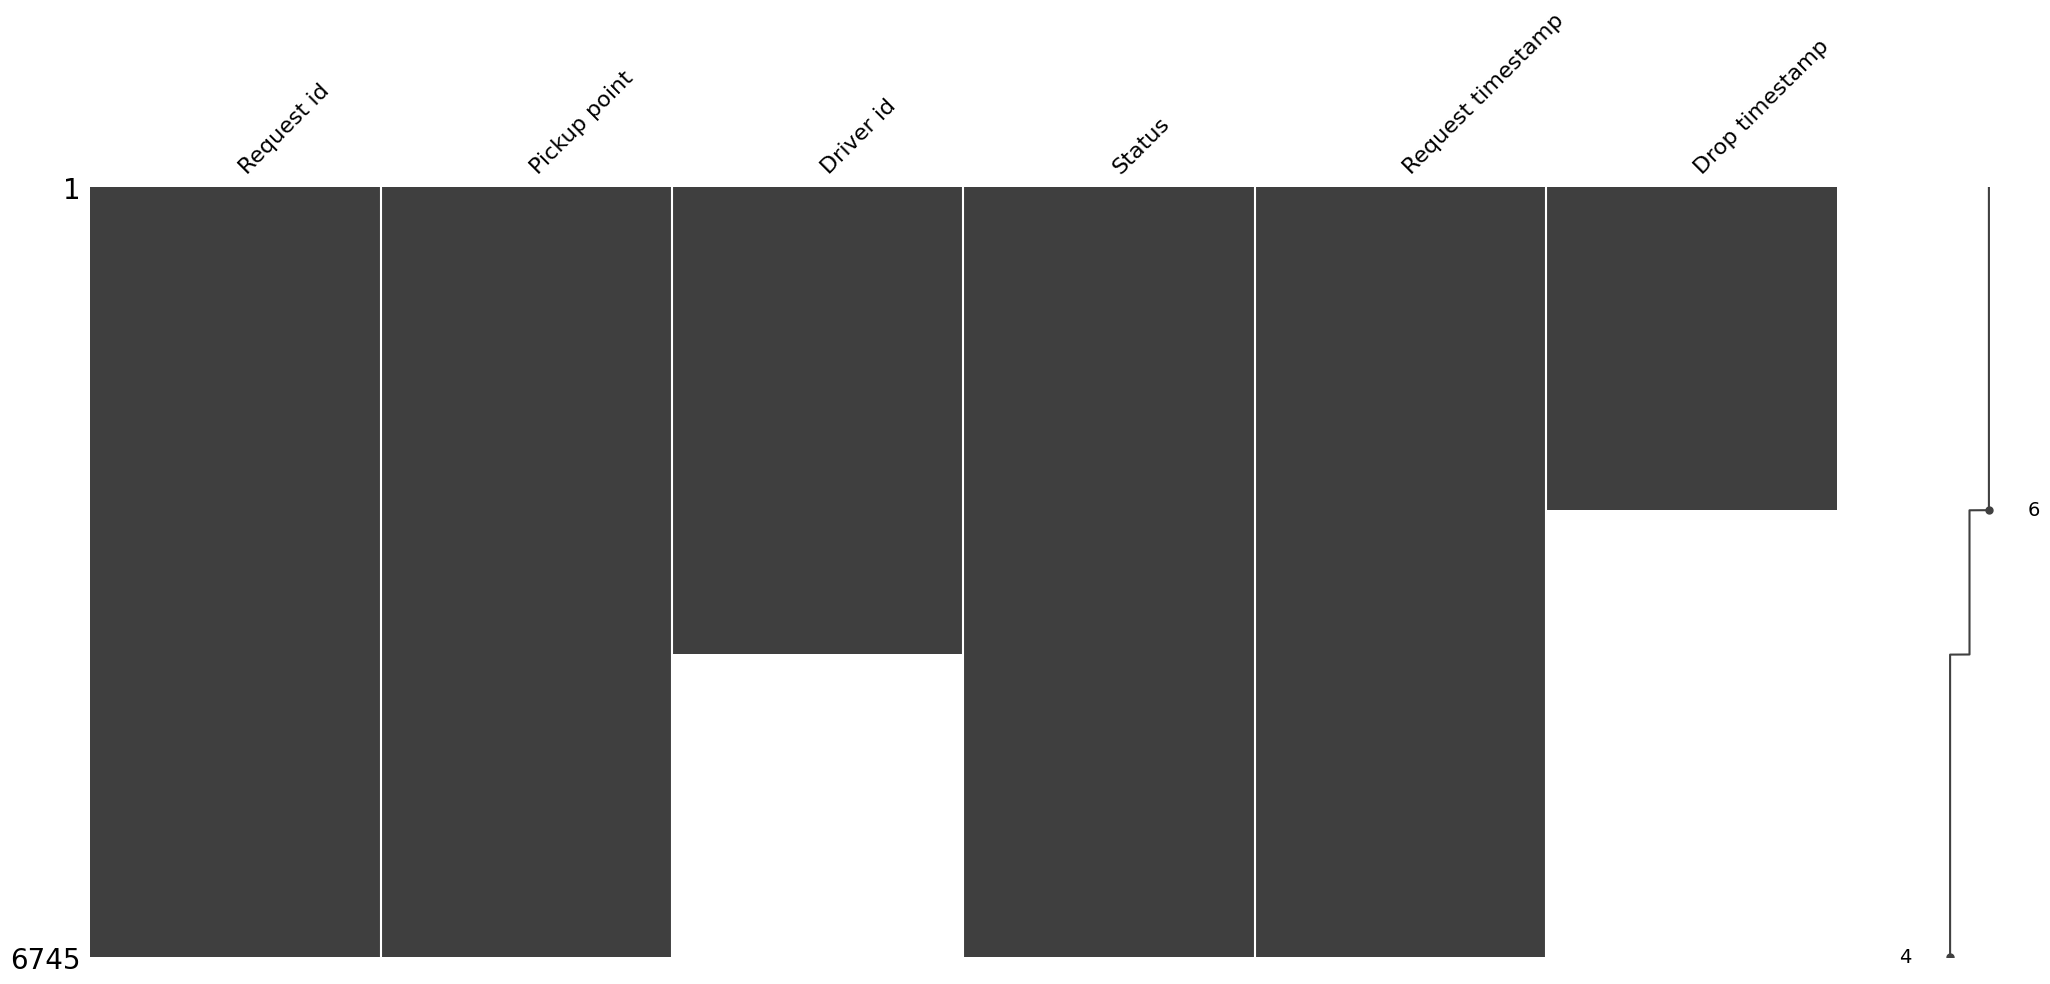

In [ ]:
import missingno as msno

# Visualize missing values
msno.matrix(df)

In [ ]:
# check data types
df.dtypes

,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request timestamp,object
Drop timestamp,object


# **2. Understanding Your Variables**

In [ ]:
# Dataset Describe
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### **Variables Description**

Check Unique Values for each variable

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} unique values")

Request id: 6745 unique values
Pickup point: 2 unique values
Driver id: 300 unique values
Status: 3 unique values
Request timestamp: 4016 unique values
Drop timestamp: 2282 unique values


# **3. Data Wrangling**

Data Wrangling Code

In [ ]:
# Convert timestamps to datetime
df['request_dt'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
df['drop_dt'] = pd.to_datetime(df['Drop timestamp'], errors='coerce')


In [ ]:
# Extract hour from request time
df['hour'] = df['request_dt'].dt.hour


In [ ]:
# Calculate trip duration
df['trip_duration'] = (df['drop_dt'] - df['request_dt']).dt.total_seconds() / 60


In [ ]:
# flags for easy grouping
df['is_cancelled'] = df['Status'] == 'Cancelled'
df['is_no_car'] = df['Status'] == 'No Cars Available'


# **4. Data Vizualization, Strorytelling & Experimenting with charts: Understand the relationships between variables**

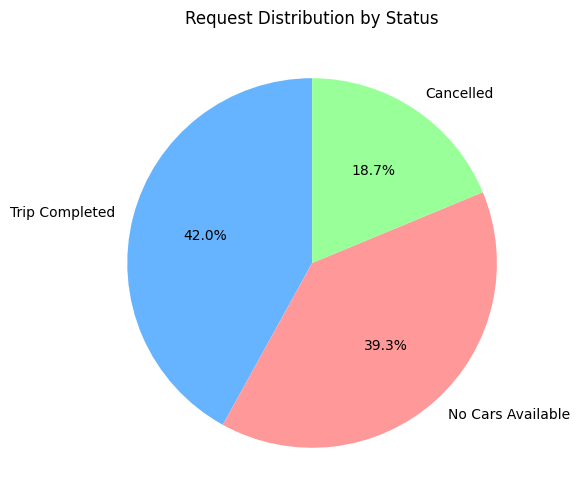

In [ ]:
plt.figure(figsize=(6, 6))
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title("Request Distribution by Status")
plt.ylabel('')
plt.show()

**Why did you pick the specific chart?**

Shows proportional distribution clearly.

**What is/are the insight(s) found from the chart?**

Shows how many trips were Completed, Cancelled, or No Cars.

**Will the gained insights help create a positive business impact?**

High 'No Cars' % indicates supply shortage – can adjust driver allocation.

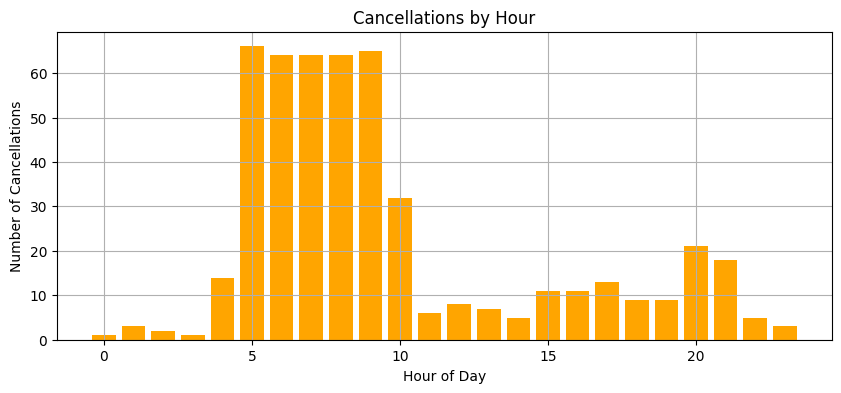

In [ ]:
cancelled = df[df['Status'] == 'Cancelled']
cancelled_by_hour = cancelled['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
plt.bar(cancelled_by_hour.index, cancelled_by_hour.values, color='orange')
plt.title('Cancellations by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Cancellations')
plt.grid(True)
plt.show()

 **Why bar chart?**

 Easy to compare cancellations across hours.

**Insight** - Cancellations peak at specific hours (e.g., late night or early morning).

**Business Impact -**

Understand & fix why drivers cancel at those hours (e.g., traffic, fatigue).

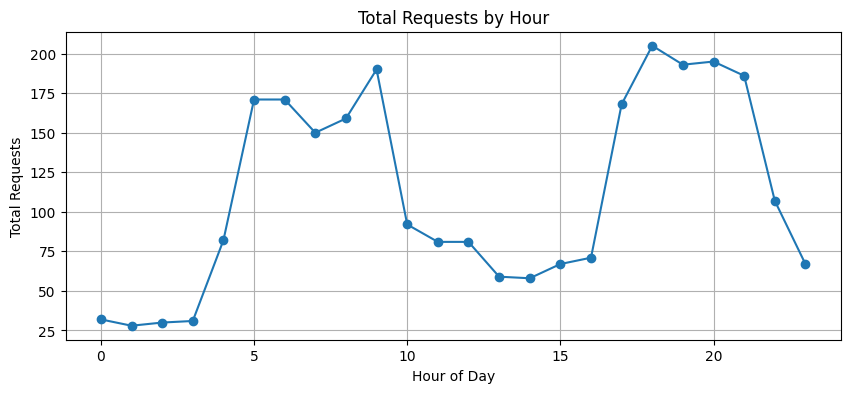

In [ ]:
# Extract hour if not already
df['hour'] = df['request_dt'].dt.hour

# Group by hour
hourly_demand = df['hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 4))
plt.plot(hourly_demand.index, hourly_demand.values, marker='o')
plt.title('Total Requests by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Requests')
plt.grid(True)
plt.show()

**Why did you pick the specific chart?**

 Best for showing hourly trends over time.

**What is/are the insight(s) found from the chart?**

Reveals peak hours like morning/evening rush.

**Will the gained insights help create a positive business impact?**

Helps Uber ensure more drivers during peak demand.

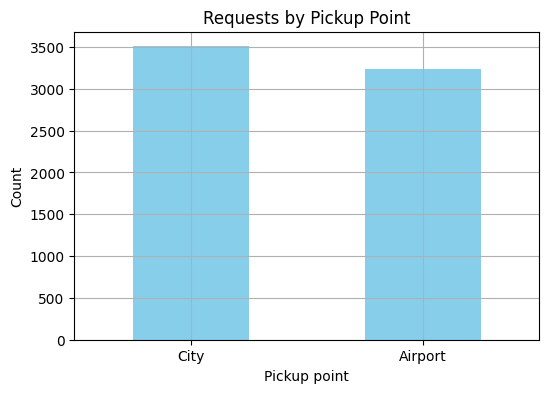

In [ ]:
pickup_counts = df['Pickup point'].value_counts()

plt.figure(figsize=(6, 4))
pickup_counts.plot(kind='bar', color='skyblue')
plt.title('Requests by Pickup Point')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

**Why did you pick the specific chart?**

Great for comparing two categories (Airport vs City).

**What is/are the insight(s) found from the chart?**

Shows where most requests are coming from.

**Will the gained insights help create a positive business impact?**

Can focus marketing or driver supply based on hotspot.

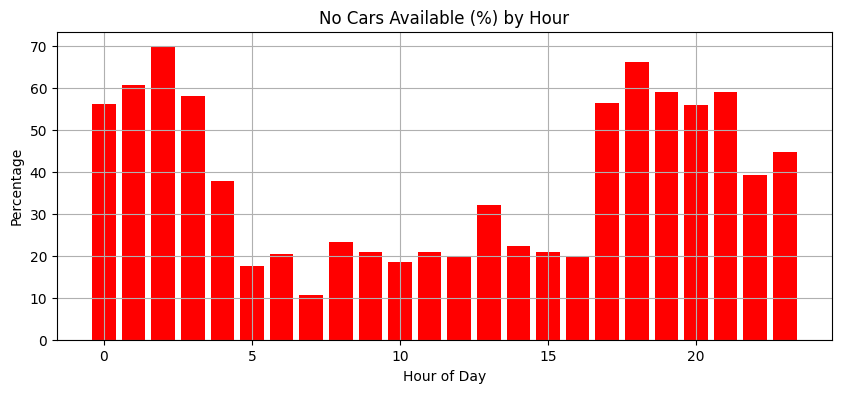

In [ ]:
no_car = df[df['Status'] == 'No Cars Available']
no_car_hour = no_car['hour'].value_counts().sort_index()
total_hour = df['hour'].value_counts().sort_index()
no_car_percent = (no_car_hour / total_hour * 100).fillna(0)

plt.figure(figsize=(10, 4))
plt.bar(no_car_percent.index, no_car_percent.values, color='red')
plt.title('No Cars Available (%) by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()

**Why did you pick the specific chart?**

Good for showing performance breakdown by time.

**What is/are the insight(s) found from the chart?**

Shows when Uber fails to meet demand (e.g., 5–7 PM).

**Will the gained insights help create a positive business impact?**

Add more drivers during high unavailability windows.

/tmp/ipython-input-31-3822939306.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed['trip_duration'] = (completed['Drop timestamp'] - completed['Request timestamp']).dt.total_seconds() / 60


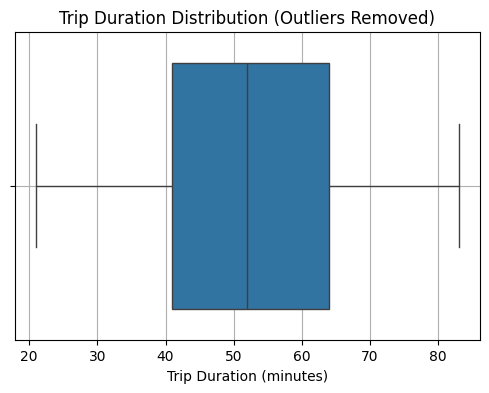

In [ ]:
# Convert timestamps to datetime
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], errors='coerce')

# Filter for completed trips
completed = df[df['Status'] == 'Trip Completed']

# Calculate trip duration in minutes
completed['trip_duration'] = (completed['Drop timestamp'] - completed['Request timestamp']).dt.total_seconds() / 60

# Remove extreme outliers (> 300 minutes)
filtered = completed[completed['trip_duration'] <= 300]

# Plot again
plt.figure(figsize=(6, 4))
sns.boxplot(x=filtered['trip_duration'])
plt.title('Trip Duration Distribution (Outliers Removed)')
plt.xlabel('Trip Duration (minutes)')
plt.grid(True)
plt.show()

**Why this chart?**

A box plot is ideal for spotting the spread, median, and outliers in a continuous variable like trip duration. After cleaning outliers (like the 40,000-minute values), we can now clearly interpret actual ride behavior.

**Insight(s)**

Most trip durations lie between 40 and 65 minutes.

The median duration (the center line in the box) is around 53 minutes, indicating typical ride time.

A few short and long duration rides exist, but within reasonable bounds (~20 to 80 min).

There are no extreme outliers anymore — the data looks normally distributed.

**Business Impact**

Efficient scheduling: Knowing average trip durations helps Uber optimize shift rotations and expected driver availability.

Customer experience: If trips are longer than expected, Uber can investigate congestion, routing, or driver behavior.

Performance benchmarks: Can be used to set SLA (service-level agreements) for different city zones or pickup points.

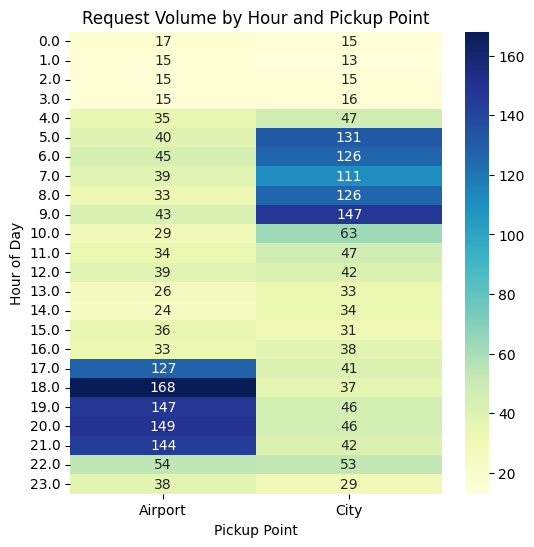

In [ ]:
pivot = pd.pivot_table(df, values='Request id',
                       index='hour', columns='Pickup point',
                       aggfunc='count', fill_value=0)

plt.figure(figsize=(6, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Request Volume by Hour and Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Hour of Day')
plt.show()

**Why heatmap?**

Clearly shows joint patterns between two categories.")

**Insight**

E.g., City has higher volume in morning, Airport peaks in evening.")

**Business Impact**

Dynamic driver allocation based on location and time.")

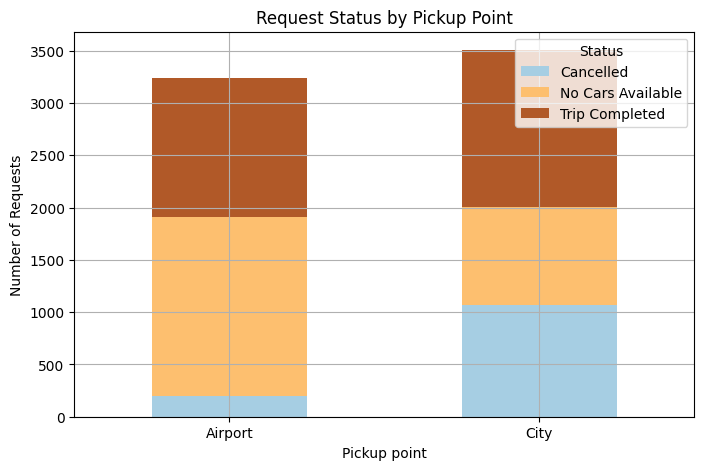

In [ ]:
status_by_pickup = df.groupby(['Pickup point', 'Status'])['Request id'].count().unstack().fillna(0)

status_by_pickup.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')
plt.title('Request Status by Pickup Point')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

**Why stacked bar?**

Great to compare total volume and breakdown by category.")

**Insight**

 One pickup point may have more 'No Cars' than another.")

**Business Impact**

 Highlights service reliability differences across locations.")

/tmp/ipython-input-28-872804846.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['hour'], shade=True, color='purple')


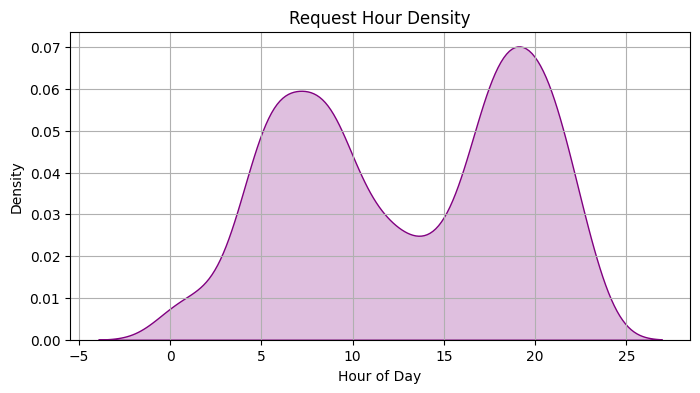

In [ ]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df['hour'], shade=True, color='purple')
plt.title('Request Hour Density')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.show()

**Why KDE? **

Smooths out the line to show trends in a visually appealing way.")

**Insight**

Helps highlight peak hours more fluidly than bar/line charts.")

**Business Impact**

Enhances time-based resource planning.")

# **5. Solution to Business Objective**

Uber aims to improve ride availability and customer satisfaction by understanding demand patterns, cancellation reasons, and supply bottlenecks. Your EDA explored when and where ride requests spike, why trips fail, and how long successful rides last.

**Business Solutions Based on EDA**

**Demand Forecasting & Shift Planning:**
Use peak hour insights to deploy more drivers during 5:00–9:00 AM and 5:00–9:00 PM, especially at airports.

**Driver Allocation Strategy:**
Incentivize drivers to be active during high-failure slots and rebalance drivers from low-demand to high-demand locations in real time.

**Proactive Alerts to Users:**
Display expected wait times or limited availability warnings during historically busy hours to reduce cancellations and improve trust.

**Improve Early Morning Service:**
Offer driver incentives or shift bonuses during the early morning rush to reduce cancellation rates and improve experience.

**Data-Driven Route Optimization:**
Use average trip durations by time/location to improve ETA predictions and better plan driver break/shift schedules.

**Conclusion -**

This EDA equips Uber with data-backed strategies to improve demand fulfillment, minimize cancellations, and better utilize drivers — all of which positively impact revenue, reliability, and customer satisfaction.